In [ ]:
#logisticregression
import pandas as pd 
from matplotlib import pyplot as plt 

In [ ]:
dataset=pd.read_csv("insurance.csv") 
dataset

,age,have_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1
5,56,1
6,55,0
7,60,1
8,62,1
9,61,1


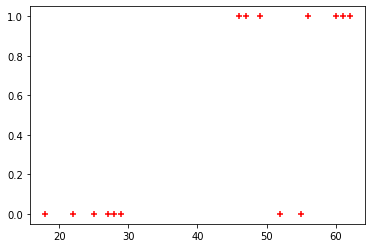

In [ ]:
plt.scatter(dataset.age,dataset.have_insurance,marker='+',color='red') 

In [ ]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(dataset[['age']],dataset.have_insurance,train_size=0.8) 
#training data
from sklearn.linear_model import LogisticRegression 
model=LogisticRegression() 
model.fit(x_train, y_train) 
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, l1_ratio=None, max_iter=100, multi_class='auto', n_jobs=None, penalty='12', random_state=None, solver='lbfgs', tol=0.0001, verbose=0, warm_start=False) 

model.coef_
print("coefficient of x is",model.coef_) 


model.intercept_ 
print("intercept of line is",model.intercept_) 

coefficient of x is [[0.13761379]]
intercept of line is [-6.17996735]


In [ ]:
import math 
def sigmoid(x): 
    return 1/(1+math.exp(-x)) 
def prediction_function(age): 
    z= 0.280409*age -7.942535
    #z=mx+c
    z
    y=sigmoid(z) 
    return y 

#predicting if person with age 33 has insurance or not
age=33
y=prediction_function(age) 
print("Probability of person with age 33 having insurance is",y) 

print("As 0.787 is greater than 0.5 which means person with age 33 has insurance ")


Probability of person with age 33 having insurance is 0.78767408876316
As 0.787 is greater than 0.5 which means person with age 33 has insurance 


Without Lib

In [ ]:
import numpy as np
import pandas as pd

# Load the data
data = pd.read_csv("insurance.csv")

# Extract the feature and target variable
X = data["age"].values.reshape(-1, 1)
y = data["have_insurance"].values.reshape(-1, 1)

# Split the data into training and testing sets
np.random.seed(42)
indices = np.random.permutation(len(X))
split = int(0.8 * len(X))
train_indices, test_indices = indices[:split], indices[split:]
X_train, X_test = X[train_indices], X[test_indices]
y_train, y_test = y[train_indices], y[test_indices]

# Scale the features
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

# Define the logistic regression model
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def predict(X, w):
    z = np.dot(X, w)
    return sigmoid(z)

def loss(X, y, w):
    y_pred = predict(X, w)
    return -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

def gradient(X, y, w):
    y_pred = predict(X, w)
    return np.dot(X.T, y_pred - y) / len(y)

def logistic_regression(X, y, num_iterations=1000, learning_rate=0.1):
    # Initialize weights to zero
    w = np.zeros((X.shape[1], 1))
    
    # Update weights using gradient descent
    for i in range(num_iterations):
        grad = gradient(X, y, w)
        w -= learning_rate * grad
        
        # Print loss every 100 iterations
        
    
    return w

# Train the model
w = logistic_regression(X_train, y_train)

# Make predictions on the test set
y_pred = predict(X_test, w)

# Convert probabilities to binary predictions
y_pred_binary = np.round(y_pred)

# Calculate RMSE
rmse = np.sqrt(np.mean((y_test - y_pred) ** 2))
print("RMSE:", rmse)

# Predict the result for a particular input
input_data = np.array([33]).reshape(1, -1)
input_data_scaled = (input_data - mean) / std

result = predict(input_data_scaled, w)'''
result =sigmoid(result)
if(result>.5)
 ''' 
print("Prediction for input:", sigmoid(result))


RMSE: 0.7948455326138908
Prediction for input: [[0.51363718]]
